## e-commerce data analysis -- using linear regression

<hr>

##### About the Dataset:
- The dataset consists of data of customers who purchases clothes online. The store offers in-store style and clothing advice sessions. 
- Essentially, customers would proceed to the store physically to have sessions/meetings with a personal stylist. Upon completion of the sessions, the customers can then order either their desired clothes either through a mobile app or website.

##### Problem Statement:
- The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

##### Aim of the Project:
- to analyze customer behaviour related to online shopping, specifically to determine whether the company should focus on improving their mobile app or website experience.
- linear regression will be used to identify which platform has a greater influence on the amount of money customers spend.

<hr>

`import libraries and load data`

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
data = pd.read_csv("customer-data.csv")

`1 - data understanding`

In [3]:
# number of rows and column (data size)
rows = data.shape[0]
cols = data.shape[1]
print(f"rows: {rows},\ncols: {cols}")

rows: 500,
cols: 8


In [4]:
# info on datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# read first 5 rows of data
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
# all columns data types
data.dtypes.to_frame()

,0
Email,object
Address,object
Avatar,object
Avg. Session Length,float64
Time on App,float64
Time on Website,float64
Length of Membership,float64
Yearly Amount Spent,float64


##### about dataset
- Email --> customer's email address
- Address --> customer's address
- Avatar --> customer's avatar color
- Avg. Session Length --> the average time a customer spends with stylist (minutes)
- Time on App --> time spent by customer on the mobile app (minutes)
- Time on Website --> time spent by customer on the website (minutes)
- Length of Membership --> duration of customer's membership (months)
- Yearly Amount Spent --> total amount of money spent by customer on company's products

In [7]:
# generate descriptive statistics of categorical variables
data.describe(include="object")

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


In [8]:
# generate descriptive statistics of numerical variables
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
# generate descriptive statistics of numerical variables
data.astype("object").describe()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,500.000000,500.000000,500.000000,500.000000,500.000000
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,34.497268,12.655651,39.577668,4.082621,587.951054
freq,1,1,7,1.000000,1.000000,1.000000,1.000000,1.000000


`2 - data preparation/cleaning`

In [10]:
# any missing values? note, isna() = isnull()
data.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [11]:
# any duplicate values?
data.duplicated().sum()

0

In [12]:
# view all columns/features
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
# rename columns
data = data.rename(columns={
    "Avg. Session Length": "Avg_Session_Length",
    "Time on App": "Time_On_App",
    "Time on Website": "Time_On_Website",
    "Length of Membership": "Length_of_Membership",
    "Yearly Amount Spent": "Yearly_Amount_Spent"
})

In [14]:
# check column names again
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_On_App',
       'Time_On_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

`3 - feature understanding`

In [15]:
# separate categorical and numerical features
cat_features = []
num_features = []

for col in data.columns:
    if data[col].dtype == "object":
        cat_features.append(col)
    else:
        num_features.append(col)

print(f"categorical: {cat_features}\nnumerical: {num_features}")

categorical: ['Email', 'Address', 'Avatar']
numerical: ['Avg_Session_Length', 'Time_On_App', 'Time_On_Website', 'Length_of_Membership', 'Yearly_Amount_Spent']


In [16]:
# categorical features

data[cat_features[:3]].describe()

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


In [17]:
for feature in cat_features:
    print(data[feature].value_counts())
    print()

Email
mstephenson@fernandez.com        1
elizabeth61@berg-braun.com       1
pamelahampton@martin-cobb.com    1
dbell@hotmail.com                1
vancealicia@hotmail.com          1
                                ..
stevenking@patterson.com         1
blevinseric@stephens.com         1
campbellross@yahoo.com           1
casey21@johnson.com              1
hannahwilson@davidson.com        1
Name: count, Length: 500, dtype: int64

Address
835 Frank Tunnel\nWrightmouth, MI 82180-9605                      1
649 King Extension\nNorth April, NY 54175                         1
91542 Jessica Springs Suite 255\nThomashaven, MT 39239-3790       1
3485 Anthony Street Apt. 119\nMikeberg, FL 32602                  1
06307 Scott Spurs Suite 161\nJessicaburgh, NH 26093-5908          1
                                                                 ..
94730 Martin Mount\nNew Matthew, VI 08142-6708                    1
PSC 3676, Box 1549\nAPO AE 26130-7683                             1
6218 Michael Stat

In [18]:
# numerical features

data[num_features[:6]].describe()

,Avg_Session_Length,Time_On_App,Time_On_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [19]:
# drop unnecessary columns/variables
data = data.drop(["Email", "Address", "Avatar"], axis=1)

# read first 5 rows
data.head()

,Avg_Session_Length,Time_On_App,Time_On_Website,Length_of_Membership,Yearly_Amount_Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


`4 - feature relationships`

find correlation between every feature

1. what is correlation?
    - measure of strength and direction of the relationship between 2 variables/features.
    - when 2 variables are correlated, it means that the changes in one variable is related to the changes in another.
2. different type of relationships
    - postive: when one variable increases, the other also increases.
    - negative: when one variable increases, the other decreases.
    - no correlation: no visible changes/pattern between the variables

In [20]:
# find correlation matrix
corr = data.corr()
corr

,Avg_Session_Length,Time_On_App,Time_On_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_On_App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_On_Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length_of_Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Amount_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

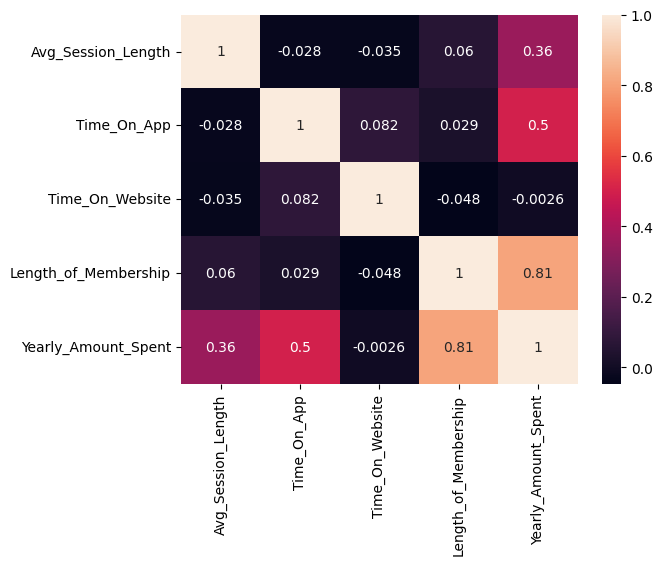

In [21]:
# generate correlation heat map using correlation matrix
sns.heatmap(corr, annot=True)

##### things to know before making an observation:
- correlation = 1 means that there is a perfect linear relationship between 2 variables.

##### based on the heatmap above, important correlations are:
- avg session length and yearly amount spent
- time on app and yearly amount spent
- length of membership and yearly amount spent

##### now just for fun, let's observe the correlation using pairplot
1. what is pairplot used for?
    - pairplot, also known as scatter plot matrix, is used to examine the relationships between multiple numerical variables.
2. understanding the output of pairplots
    - diagonal plots --> histograms that helps one to understand the distribution of each variable.
        - symmetric/normal distribution: histogram has a bell curve shape, hence its normally distributed.
        - skewness: histogram is skewed to the left of right, hence data is not normally distributed.
    - off-diagonal plots --> scatter plots between pairs of variables.
        - positive correlation: scatter plot shows an upward trend (points sloping up)
        - negative correlation: scatter plot shows a downward trend (points sloping down)
        - no correlation: scatter plot shows a cloud of points without any clear slope (no upward or downward pattern)

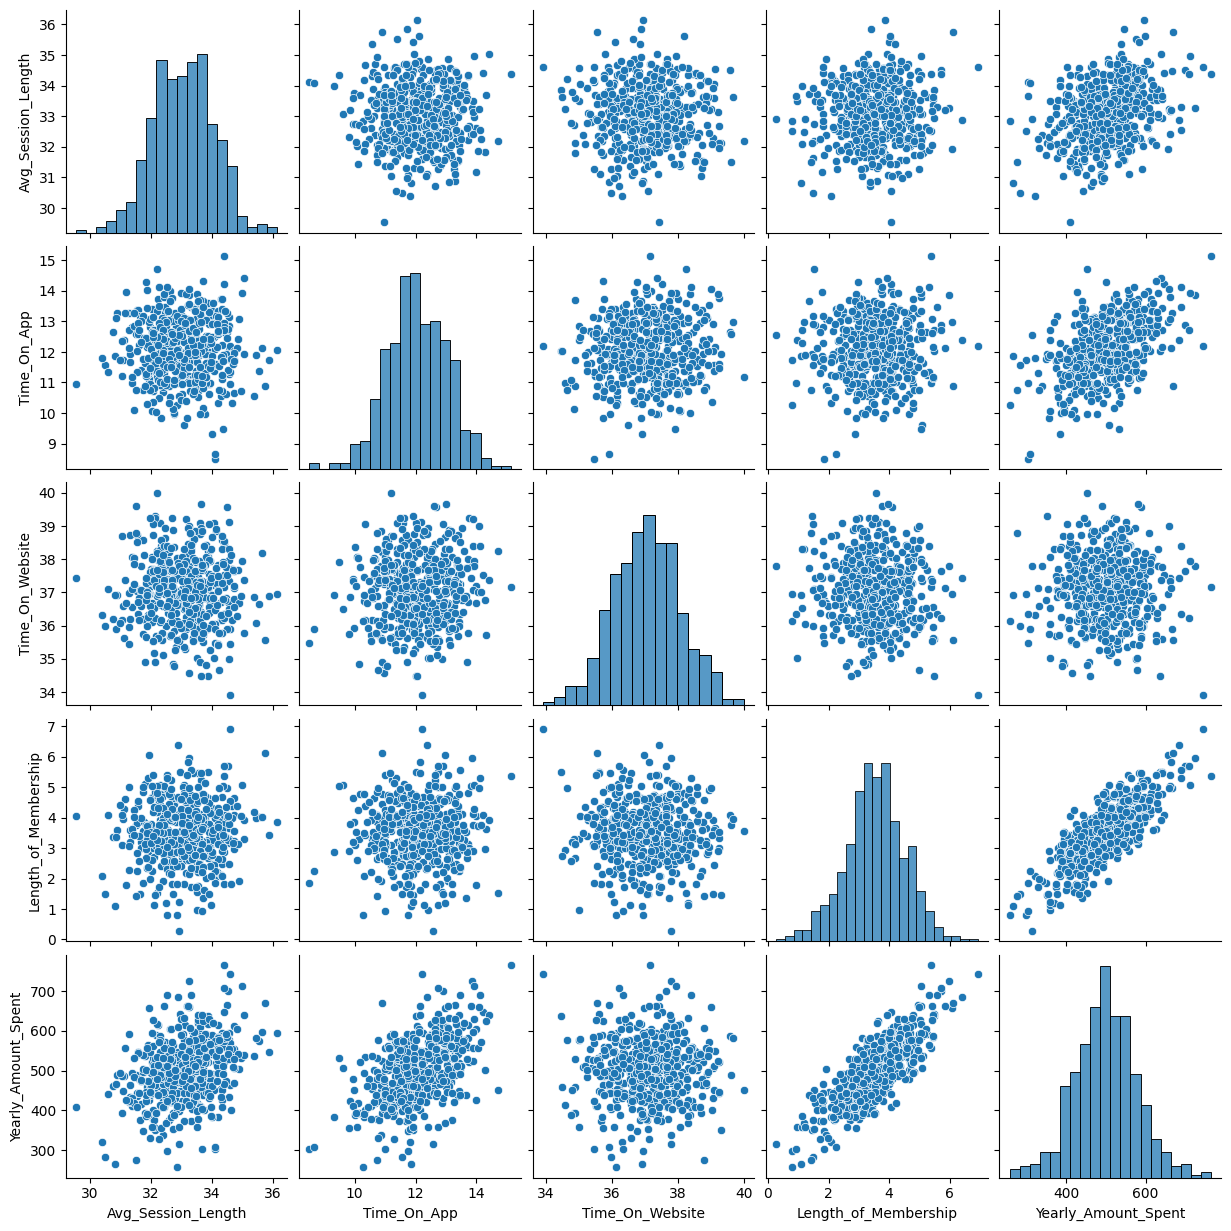

In [22]:
# now just for fun, let's observe the correlation using pairplot
sns.pairplot(data)
plt.show()

observation:
1. strong positive correlation between <font color='burgundy'>Length_of_Membership</font> and <font color='red'>Yearly_Amount_Spent</font>
2. moderate positive correlation between <font color='blue'>Time_On_App</font> and <font color='red'>Yearly_Amount_Spent</font>
3. moderate positive correlation between <font color='green'>Average_Session_Length</font> and <font color='red'>Yearly_Amount_Spent</font>

`5 - linear regression analysis`

some questions for personal understanding:
1. what is a regression in machine learning?
    - regression is a type of supervised machine learning method to predict continuous outcomes/values.
    - involves modeling the relationship between a dependent variable (target) and the independent variables (features) by fitting a mathematical function to the data.
    - regression is machine learning model that estimates the relationships between numerical and continuous variable.
2. what is linear regression?
    - assumes a linear relationship between the dependent and independent variables.
    - uses the linear function (y=mx+c) to estimate the relationship between the dependent (target) and independent (features) variables.
3. what is gradient descent?
    - an iterative optimization algorithm to identify the values of the parameters that minimize a cost function.
4. what is least squares method?
    - is a form of mathematical regression analysis used to determine the line of best fit for a set of data points by minimizing the sum of the squares of the vertical distances between the observed values and the values predicted by the model.
    - in orther words, the least squares method is used to minimize the sum of the squares of the residuals (the differences between the observed values and the predicted values).
1. what is a regression line?
    - a straight line that best fits the data points by minimizing the errors between observed and predicted values.
2. what is a cost function?
    - a cost function, also known as loss function is a measure of how well a model's predictions match actual data. It quantifies the error between predicted values and actual values.
    - the goal of linear regression is to find the best-fitting line through the data points by minimizing this cost function.
3. why is there a need to calculate the derivatives of the cost with respect to each parameter in linear regression?
    - calculating the derivatives of the cost function with respect to each parameter is essential for optimizing the parameters in linear regression. These derivatives provide the necessary information to adjust the parameters in a way that progressively reduces the cost function, leading to the best-fitting model. This process is the foundation of gradient descent, a widely used optimization algorithm in machine learning.
4. what are the differences between a cost function and least square method?
    - purpose --> the least square method is a specific approach used to minimize the cost function in the context of linear regression. the cost function provides the metric that the least square method aims to minimize.
    - scope --> the least square method is a techniqe or procedure, while the cost function is a mathematical expression that quantifies the error of a model.

model --> linear regression<br>
algorithm --> gradient descent

steps to linear regression analysis
1. split data into training and testing sets
2. normalize the dataset (no need to normalize as there are no categorical data involved)
3. build linear regression model (dont need to build, just use the built-in version)
4. train the model
5. evaluate linear regression model
6. visualize the results

In [25]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
data.columns

Index(['Avg_Session_Length', 'Time_On_App', 'Time_On_Website',
       'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

In [30]:
# define features and target
X = data[["Avg_Session_Length", "Time_On_App", "Time_On_Website", "Length_of_Membership"]]
y = data["Yearly_Amount_Spent"]

# X --> independent variables/ input features
# y --> dependent variable/ target values

In [31]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train_test_split method --> splits the datasets into training and testing data.
# train dataset --> will be used to train the model.
# test dataset --> will be used to test the model.
# test size 0.3 indicates that 30% of the data is for testing and the rest is for training.

In [34]:
print("each size:\n")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

each size:

X_train: (350, 4), X_test: (150, 4)
y_train: (350,), y_test: (150,)


In [37]:
# create instance of the linear regression model
lrModel = LinearRegression()

In [38]:
# train the model
lrModel.fit(X_train, y_train)

LinearRegression()

more questions for understanding:
1. linear regression equation: y = mx + c
    - y = dependent variable/predicted value of the dependent variable
    - x = independent variable
    - m = slope of the line/regression coefficient
    - c = intercept/constant
2. what is a regression line?
    - a straight line that best fits the data points by minimizing the errors between observed and predicted values.
3. how to fit a regression line in the XY plot?
    - use the least squares method
4. what is least squares method?
    - is a form of mathematical regression analysis used to determine the line of best fit for a set of data points by minimizing the sum of the squares of the vertical distances between the observed values and the values predicted by the model.
    - in orther words, the least squares method is used to minimize the sum of the squares of the residuals (the differences between the observed values and the predicted values).
5. what are regression coefficients?
    - regression coefficients are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response. In linear regression, coefficients are the values that multiply the predictor values.

In [50]:
# now, let's examine the coefficients in the linear regression model
# why? to look for insights into the relationship between each independent variable (feature) and 
# the dependent variable (target)

# info --> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
coef = pd.DataFrame(data=lrModel.coef_, index=X.columns, columns=["Coefficients"])
coef

# lrModel.coef_ --> coefficients of the linear regression model
# X.columns --> gets the feature names, which will be used as the index of the dataframe
# columns=["Coefficients"] --> sets the name of the columns in the dataframe

,Coefficients
Avg_Session_Length,25.724256
Time_On_App,38.597135
Time_On_Website,0.459148
Length_of_Membership,61.674732


let's first try to understand the influence of features:
- each coefficient represents the impact that a corresponding feature has on a target variable.
- these coefficients indicate how much the dependent variable (target) will change with a unit change in the corresponding independent variable (feature), holding all other variables constant.
- The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.
        - A positive sign indicates that as the predictor variable (feature) increases, the response variable (predicted target value) also increases.
        - A negative sign indicates that as the predictor variable (feature) increases, the response variable (predicted target value) decreases.

how about the magnitude of the coefficients?
- the magnitude of the coefficients can indicate how important or influential each feature is in the prediction.
- larger coefficient value --> feature has a stronger influence on the target variable.
- smaller coefficient value --> feature has a weaker influence on the target variable.

observation on the linear regression model's coefficients:
- Length_of_Membership --> has the highest coefficient value, hence it has the largest impact on the predicted target value.
- Time_On_App --> has the second highest coefficient value.
- Avg_Session_Length --> has the lowest impact among the three features, but it still positively influences the target variable.

In [63]:
# now, lets evaluate our linear regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [58]:
# 1 - make predictions
y_pred = lrModel.predict(X_test)

In [59]:
# 2 - view predictions
y_pred

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

before evaluating the linear regression model, we must first understand the different evaluation metrics:
1. Mean Square Error (MSE/RMSE):
    - MSE is calculated by the sum of square of prediction error.
    - where the prediction is the difference between the true values and predicted values (square it to avoid negative errors).
    - how does the output represent good or bad fit model?
        - if MSE or RMSE is 0.0, then it has no error.
        - smaller values are better as it indicates more accurate predictions.
2. Mean Absolute Error (MAE):
    - MAE is the average of the absolute differences between the true values and predicted values.
    - how does the output represent good or bad fit model?
        - lower MAE values indicate better predictive accuracy.
3. R-squared (R2 score):
    - proportion of the variance in the dependent variable that is predictable from the independent variables.
    - how does the output represent good or bad fit model?
        - it ranges from 0 to 1, with higher values indicating a better fit.
3. Residual Analysis:
    - plotting residuals can help identify patterns in the model's predictions.
    - residuals are the differences between the observed values and the predicted values.

In [83]:
# 3 - model evaluation metrics

# 3.1 mean square error
mse = mean_squared_error(y_test, y_pred)

# 3.2 root mean square error
rmse = np.sqrt(mse)

# 3.3 mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# 3.4 r-squared
r_square = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Test Score: {r_square*100:.2f}%")

MSE: 103.91554136503333
RMSE: 10.193897260863155
MAE: 8.426091641432116
Test Score: 98.09%


In [75]:
# 3.4 residual analysis

# calculate residuals
residuals = y_test - y_pred

In [76]:
# view residuals
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly_Amount_Spent, Length: 150, dtype: float64

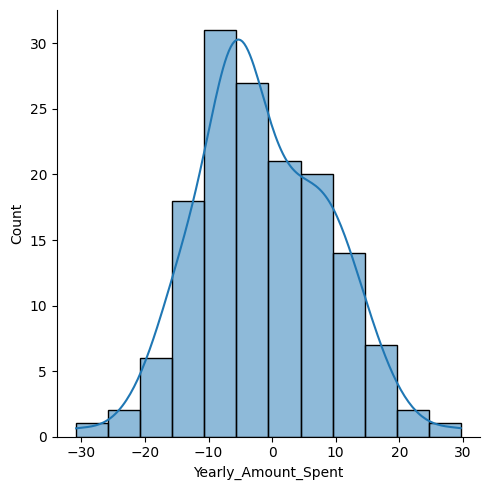

In [79]:
# plot the residuals using seaborn's distribution plot
sns.displot(residuals, kde=True)
plt.show()

observation:
from the distribution plot above, we can see that the residuals are normally distributed.

`hence, we can conclude that the most influential features are the Time_On_App and Length_of_Membership`